# Model Evaluation Assignment
**Student:** Kaustubh  
**Date:** February 3, 2026  
**Dataset:** Adult Census Income Dataset


---
## Part 1: Decision Trees – Theory & Implementation

### 1.1 Theory: Gini Impurity vs Entropy

**Gini Impurity:**
- Measures the probability of incorrectly classifying a randomly chosen element
- Formula: $Gini = 1 - \sum_{i=1}^{n} p_i^2$
- Range: [0, 0.5] for binary classification
- Faster to compute (no logarithms)
- Default in scikit-learn's DecisionTreeClassifier

**Entropy:**
- Measures the amount of information/disorder in the data
- Formula: $Entropy = -\sum_{i=1}^{n} p_i \log_2(p_i)$
- Range: [0, 1] for binary classification
- More computationally expensive
- Tends to create more balanced trees

**Key Differences:**
- Gini favors larger partitions; Entropy produces more balanced splits
- Performance difference is minimal in practice
- Gini is computationally faster

### 1.2 Theory: Overfitting in Decision Trees

**What is Overfitting?**
- Tree learns training data too well, including noise and outliers
- Perfect training accuracy but poor test performance
- Creates overly complex trees with many levels

**Causes:**
- No depth limit (tree grows until pure leaf nodes)
- Small min_samples_split allows splitting on few samples
- No pruning mechanisms

**Solutions:**
- Limit max_depth
- Set min_samples_split and min_samples_leaf
- Use pruning (cost complexity pruning)
- Ensemble methods (Random Forests)

### 1.3 Theory: Key Hyperparameters

**max_depth:**
- Maximum depth of the tree
- Higher values → more complex tree → potential overfitting
- Lower values → simpler tree → potential underfitting
- Typical range: 3-20

**min_samples_split:**
- Minimum samples required to split an internal node
- Higher values → fewer splits → simpler tree
- Prevents splitting on small sample sizes
- Typical values: 2-50

**min_samples_leaf:**
- Minimum samples required in a leaf node
- Similar effect to min_samples_split
- Smooths the model, especially in regression

In [10]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ All libraries imported successfully")

✓ All libraries imported successfully


### 1.4 Load and Explore Dataset

In [11]:
# Load dataset
df = pd.read_csv('/Users/bot/Desktop/AI_Tr_BOT/AI_training_BOT/Tree_based_model/data/adult.csv')

print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nTarget Variable Distribution:")
print(df['income'].value_counts())

Dataset Shape: (32561, 15)

First 5 rows:
   age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1   

### 1.5 Data Preprocessing

In [12]:
# Handle missing values (replace '?' with NaN)
df = df.replace('?', np.nan)

# Fill missing values with mode
for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

# Encode target variable
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Label encode categorical variables
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

print("✓ Data preprocessing completed")
print(f"\nCategorical columns encoded: {len(categorical_cols)}")
print(f"Total features: {df.shape[1] - 1}")

✓ Data preprocessing completed

Categorical columns encoded: 8
Total features: 14


### 1.6 Train-Test Split

In [13]:
# Separate features and target
X = df.drop('income', axis=1)
y = df['income']

# Split data (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]:,}")
print(f"Test set size: {X_test.shape[0]:,}")
print(f"\nClass distribution in training set:")
print(y_train.value_counts(normalize=True))

Training set size: 26,048
Test set size: 6,513

Class distribution in training set:
income
0    0.759175
1    0.240825
Name: proportion, dtype: float64


### 1.7 Train Decision Tree Classifier

In [14]:
# Train Decision Tree
dt_model = DecisionTreeClassifier(
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)

dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Calculate metrics
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt)
dt_recall = recall_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt)

print("="*60)
print("DECISION TREE CLASSIFIER - PERFORMANCE METRICS")
print("="*60)
print(f"Accuracy:  {dt_accuracy:.4f}")
print(f"Precision: {dt_precision:.4f}")
print(f"Recall:    {dt_recall:.4f}")
print(f"F1-Score:  {dt_f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt, target_names=['<=50K', '>50K']))

DECISION TREE CLASSIFIER - PERFORMANCE METRICS
Accuracy:  0.8505
Precision: 0.7168
Recall:    0.6263
F1-Score:  0.6685

Classification Report:
              precision    recall  f1-score   support

       <=50K       0.89      0.92      0.90      4945
        >50K       0.72      0.63      0.67      1568

    accuracy                           0.85      6513
   macro avg       0.80      0.77      0.79      6513
weighted avg       0.85      0.85      0.85      6513



---
## Part 2: Random Forests & Ensembles

### 2.1 Theory: Bagging (Bootstrap Aggregating)

**What is Bagging?**
- Ensemble technique that trains multiple models on random subsets of data
- Each subset is created by sampling with replacement (bootstrap sampling)
- Final prediction is made by averaging (regression) or voting (classification)

**How it Works:**
1. Create N bootstrap samples from the original training data
2. Train a model on each bootstrap sample
3. Combine predictions (majority vote for classification)

**Benefits:**
- Reduces variance without increasing bias
- Helps prevent overfitting
- Works well with high-variance models (like deep trees)

### 2.2 Theory: Why Random Forests Reduce Overfitting

**Random Forest = Bagging + Feature Randomness**

**Key Mechanisms:**
1. **Bootstrap Sampling:** Each tree sees different subset of data
2. **Feature Randomness:** Each split considers random subset of features
3. **Ensemble Averaging:** Combines predictions from many trees

**Why It Works:**
- Individual trees can overfit but in different ways
- Averaging smooths out individual errors
- Decorrelates trees (prevents all trees from making same mistakes)
- No single tree dominates the prediction

**vs Single Decision Tree:**
- Single tree: High variance, prone to overfitting
- Random Forest: Low variance, better generalization

### 2.3 Theory: Feature Importance

**What is Feature Importance?**
- Measures how much each feature contributes to predictions
- Based on reduction in impurity (Gini or Entropy)

**Calculation:**
- For each feature, sum impurity decrease across all trees
- Normalize to get relative importance (sums to 1)

**Use Cases:**
- Feature selection (remove low-importance features)
- Model interpretation
- Domain insights

### 2.4 Train Random Forest Classifier

In [15]:
# Train Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Calculate metrics
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

print("="*60)
print("RANDOM FOREST CLASSIFIER - PERFORMANCE METRICS")
print("="*60)
print(f"Accuracy:  {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall:    {rf_recall:.4f}")
print(f"F1-Score:  {rf_f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['<=50K', '>50K']))

RANDOM FOREST CLASSIFIER - PERFORMANCE METRICS
Accuracy:  0.8594
Precision: 0.7753
Recall:    0.5855
F1-Score:  0.6672

Classification Report:
              precision    recall  f1-score   support

       <=50K       0.88      0.95      0.91      4945
        >50K       0.78      0.59      0.67      1568

    accuracy                           0.86      6513
   macro avg       0.83      0.77      0.79      6513
weighted avg       0.85      0.86      0.85      6513



### 2.5 Compare Decision Tree vs Random Forest

In [16]:
# Create comparison DataFrame
comparison = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest'],
    'Accuracy': [dt_accuracy, rf_accuracy],
    'Precision': [dt_precision, rf_precision],
    'Recall': [dt_recall, rf_recall],
    'F1-Score': [dt_f1, rf_f1]
})

print(comparison.to_string(index=False))
print(f"\n✓ Random Forest Improvement: {(rf_accuracy - dt_accuracy)*100:.2f}%")

        Model  Accuracy  Precision   Recall  F1-Score
Decision Tree  0.850453   0.716788 0.626276  0.668482
Random Forest  0.859358   0.775338 0.585459  0.667151

✓ Random Forest Improvement: 0.89%


### 2.6 Feature Importance Analysis

Top 10 Most Important Features:
           Feature  Importance
10    capital.gain    0.200875
7     relationship    0.185764
4    education.num    0.144528
5   marital.status    0.121150
0              age    0.098461
12  hours.per.week    0.053893
11    capital.loss    0.048635
3        education    0.038225
6       occupation    0.035095
2           fnlwgt    0.028267


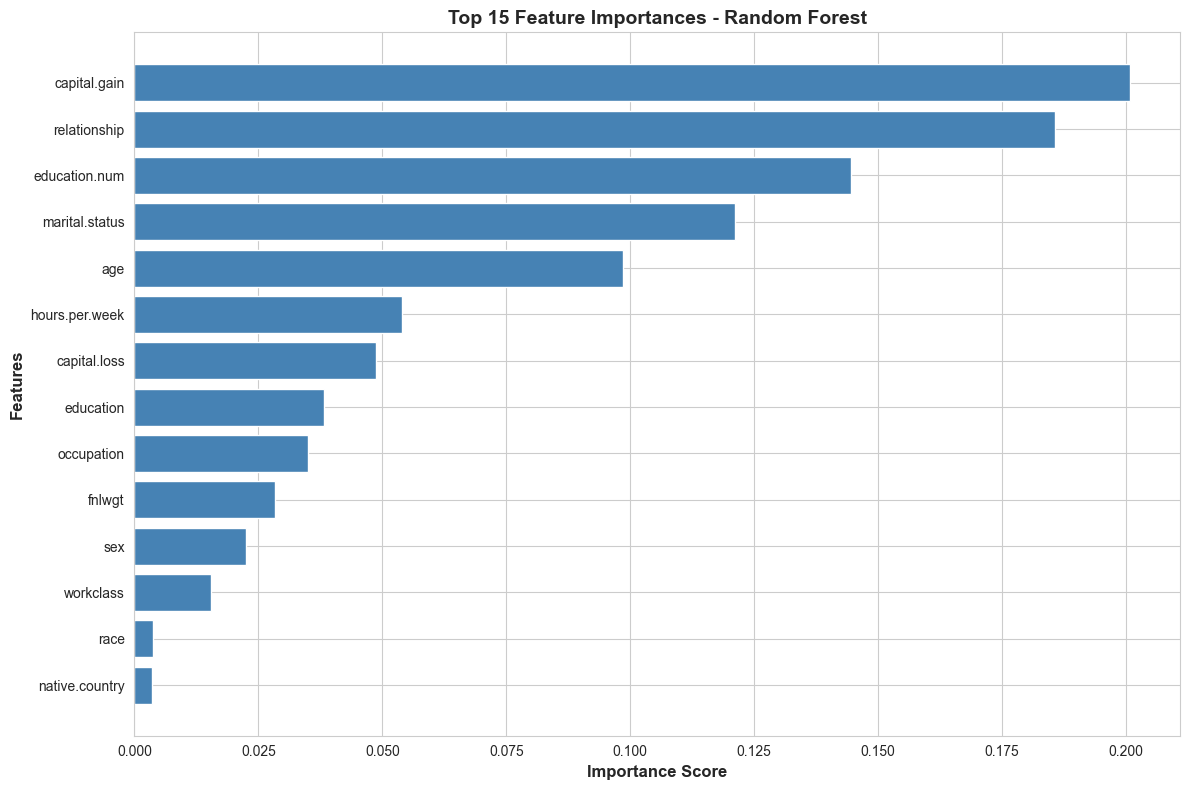

In [17]:
# Get feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("Top 10 Most Important Features:")
print(feature_importance.head(10))

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(feature_importance.head(15)['Feature'], 
         feature_importance.head(15)['Importance'],
         color='steelblue')
plt.xlabel('Importance Score', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title('Top 15 Feature Importances - Random Forest', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

---
## Part 3: Gradient Boosting (XGBoost)

### 3.1 Theory: Boosting vs Bagging

**Bagging (Bootstrap Aggregating):**
- Trains models **in parallel**
- Each model is independent
- Reduces **variance**
- Examples: Random Forest

**Boosting:**
- Trains models **sequentially**
- Each model corrects errors of previous model
- Reduces **bias** and **variance**
- Examples: XGBoost, AdaBoost, Gradient Boosting

**Key Differences:**
| Aspect | Bagging | Boosting |
|--------|---------|----------|
| Training | Parallel | Sequential |
| Focus | Reduce variance | Reduce bias & variance |
| Weights | Equal | Adaptive |
| Overfitting | Less prone | More prone (requires tuning) |
| Speed | Faster | Slower |

### 3.2 Theory: Sequential Learning in Boosting

**How Gradient Boosting Works:**
1. Start with a weak learner (shallow tree)
2. Calculate residuals (errors) from predictions
3. Train next tree to predict these residuals
4. Add new tree's predictions to ensemble
5. Repeat steps 2-4

**Key Idea:**
- Each tree focuses on mistakes of previous trees
- Gradually improves predictions
- Final prediction = sum of all tree predictions


### 3.3 Theory: Learning Rate

**What is Learning Rate?**
- Controls how much each tree contributes to final prediction
- Also called **shrinkage** or **eta (η)**
- Ranges from 0 to 1

**Effect:**
- **High learning rate (e.g., 0.3):**
  - Faster training
  - Fewer trees needed
  - Higher risk of overfitting
  
- **Low learning rate (e.g., 0.01):**
  - Slower training
  - More trees needed
  - Better generalization
  - Less overfitting

**Best Practice:**
- Lower learning rate + more trees = better performance
- Typical values: 0.01 to 0.3
- Trade-off between speed and accuracy

### 3.4 Train XGBoost Classifier

In [18]:
# Train XGBoost
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Calculate metrics
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_precision = precision_score(y_test, y_pred_xgb)
xgb_recall = recall_score(y_test, y_pred_xgb)
xgb_f1 = f1_score(y_test, y_pred_xgb)

print("="*60)
print("XGBOOST CLASSIFIER - PERFORMANCE METRICS")
print("="*60)
print(f"Accuracy:  {xgb_accuracy:.4f}")
print(f"Precision: {xgb_precision:.4f}")
print(f"Recall:    {xgb_recall:.4f}")
print(f"F1-Score:  {xgb_f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=['<=50K', '>50K']))

XGBOOST CLASSIFIER - PERFORMANCE METRICS
Accuracy:  0.8706
Precision: 0.7765
Recall:    0.6492
F1-Score:  0.7072

Classification Report:
              precision    recall  f1-score   support

       <=50K       0.89      0.94      0.92      4945
        >50K       0.78      0.65      0.71      1568

    accuracy                           0.87      6513
   macro avg       0.84      0.79      0.81      6513
weighted avg       0.87      0.87      0.87      6513



### 3.5 Compare All Models


MODEL COMPARISON - ALL ALGORITHMS
        Model  Accuracy  Precision   Recall  F1-Score
Decision Tree  0.850453   0.716788 0.626276  0.668482
Random Forest  0.859358   0.775338 0.585459  0.667151
      XGBoost  0.870567   0.776506 0.649235  0.707190


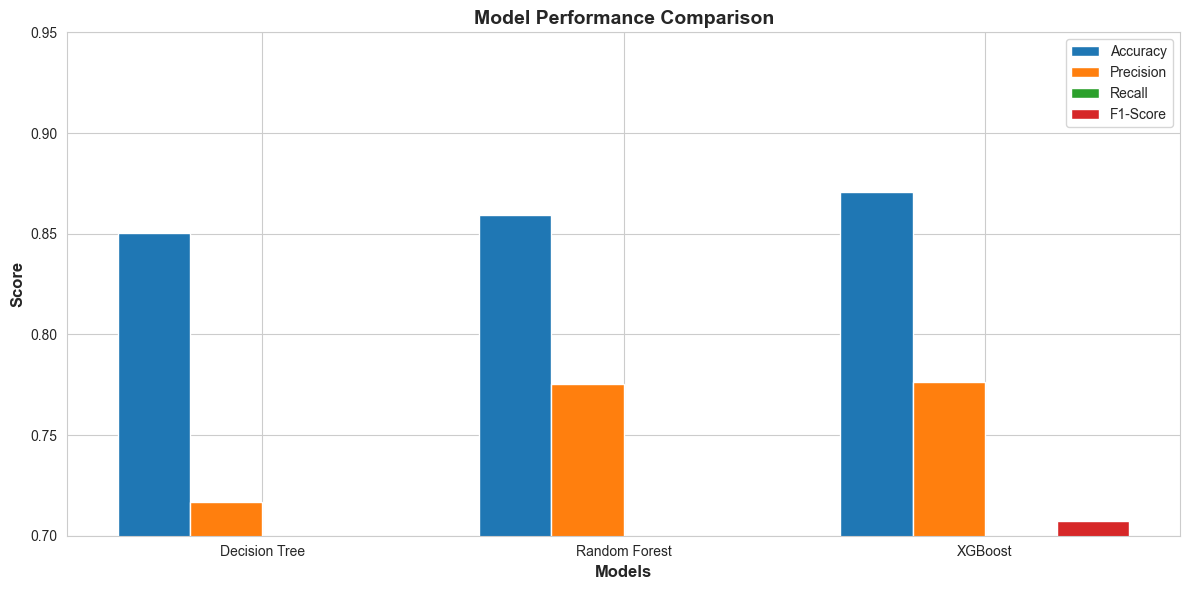

In [19]:
# Create comprehensive comparison
all_comparison = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'XGBoost'],
    'Accuracy': [dt_accuracy, rf_accuracy, xgb_accuracy],
    'Precision': [dt_precision, rf_precision, xgb_precision],
    'Recall': [dt_recall, rf_recall, xgb_recall],
    'F1-Score': [dt_f1, rf_f1, xgb_f1]
})

print("\n" + "="*80)
print("MODEL COMPARISON - ALL ALGORITHMS")
print("="*80)
print(all_comparison.to_string(index=False))
print("="*80)

# Plot comparison
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
x = np.arange(len(all_comparison))
width = 0.2

ax.bar(x - 1.5*width, all_comparison['Accuracy'], width, label='Accuracy', color='#1f77b4')
ax.bar(x - 0.5*width, all_comparison['Precision'], width, label='Precision', color='#ff7f0e')
ax.bar(x + 0.5*width, all_comparison['Recall'], width, label='Recall', color='#2ca02c')
ax.bar(x + 1.5*width, all_comparison['F1-Score'], width, label='F1-Score', color='#d62728')

ax.set_xlabel('Models', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Model Performance Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(all_comparison['Model'])
ax.legend()
ax.set_ylim([0.7, 0.95])
plt.tight_layout()
plt.show()

---
## Part 4: Hyperparameter Tuning & Interpretability

### 4.1 Hyperparameter Tuning with GridSearchCV

In [20]:
    
# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 15, 20],
    'min_samples_split': [10, 20, 30],
    'min_samples_leaf': [5, 10, 15]
}

# Create GridSearchCV object
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

print("Starting GridSearchCV...")
grid_search.fit(X_train, y_train)

print("\n" + "="*60)
print("HYPERPARAMETER TUNING RESULTS")
print("="*60)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best CV Score: {grid_search.best_score_:.4f}")

# Evaluate tuned model
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)
tuned_accuracy = accuracy_score(y_test, y_pred_tuned)

print(f"Test Accuracy (Tuned Model): {tuned_accuracy:.4f}")
print(f"Improvement over default: {(tuned_accuracy - rf_accuracy)*100:.2f}%")

Starting GridSearchCV...
Fitting 3 folds for each of 81 candidates, totalling 243 fits


/Users/bot/Desktop/AI_Tr_BOT/AI_training_BOT/ML_assignment1_kaustubh/mlenv/lib/python3.14/site-packages/sklearn/utils/parallel.py:144: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/Users/bot/Desktop/AI_Tr_BOT/AI_training_BOT/ML_assignment1_kaustubh/mlenv/lib/python3.14/site-packages/sklearn/utils/parallel.py:144: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
/Users/bot/Desktop/AI_Tr_BOT/AI_training_BOT/ML_assignment1_kaustubh/mlenv/lib/python3.14/site-packages/sklearn/utils/parallel.py:144: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit


HYPERPARAMETER TUNING RESULTS
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 20, 'n_estimators': 100}
Best CV Score: 0.8636
Test Accuracy (Tuned Model): 0.8609
Improvement over default: 0.15%


### 4.2 Model Interpretability: Tree Visualization

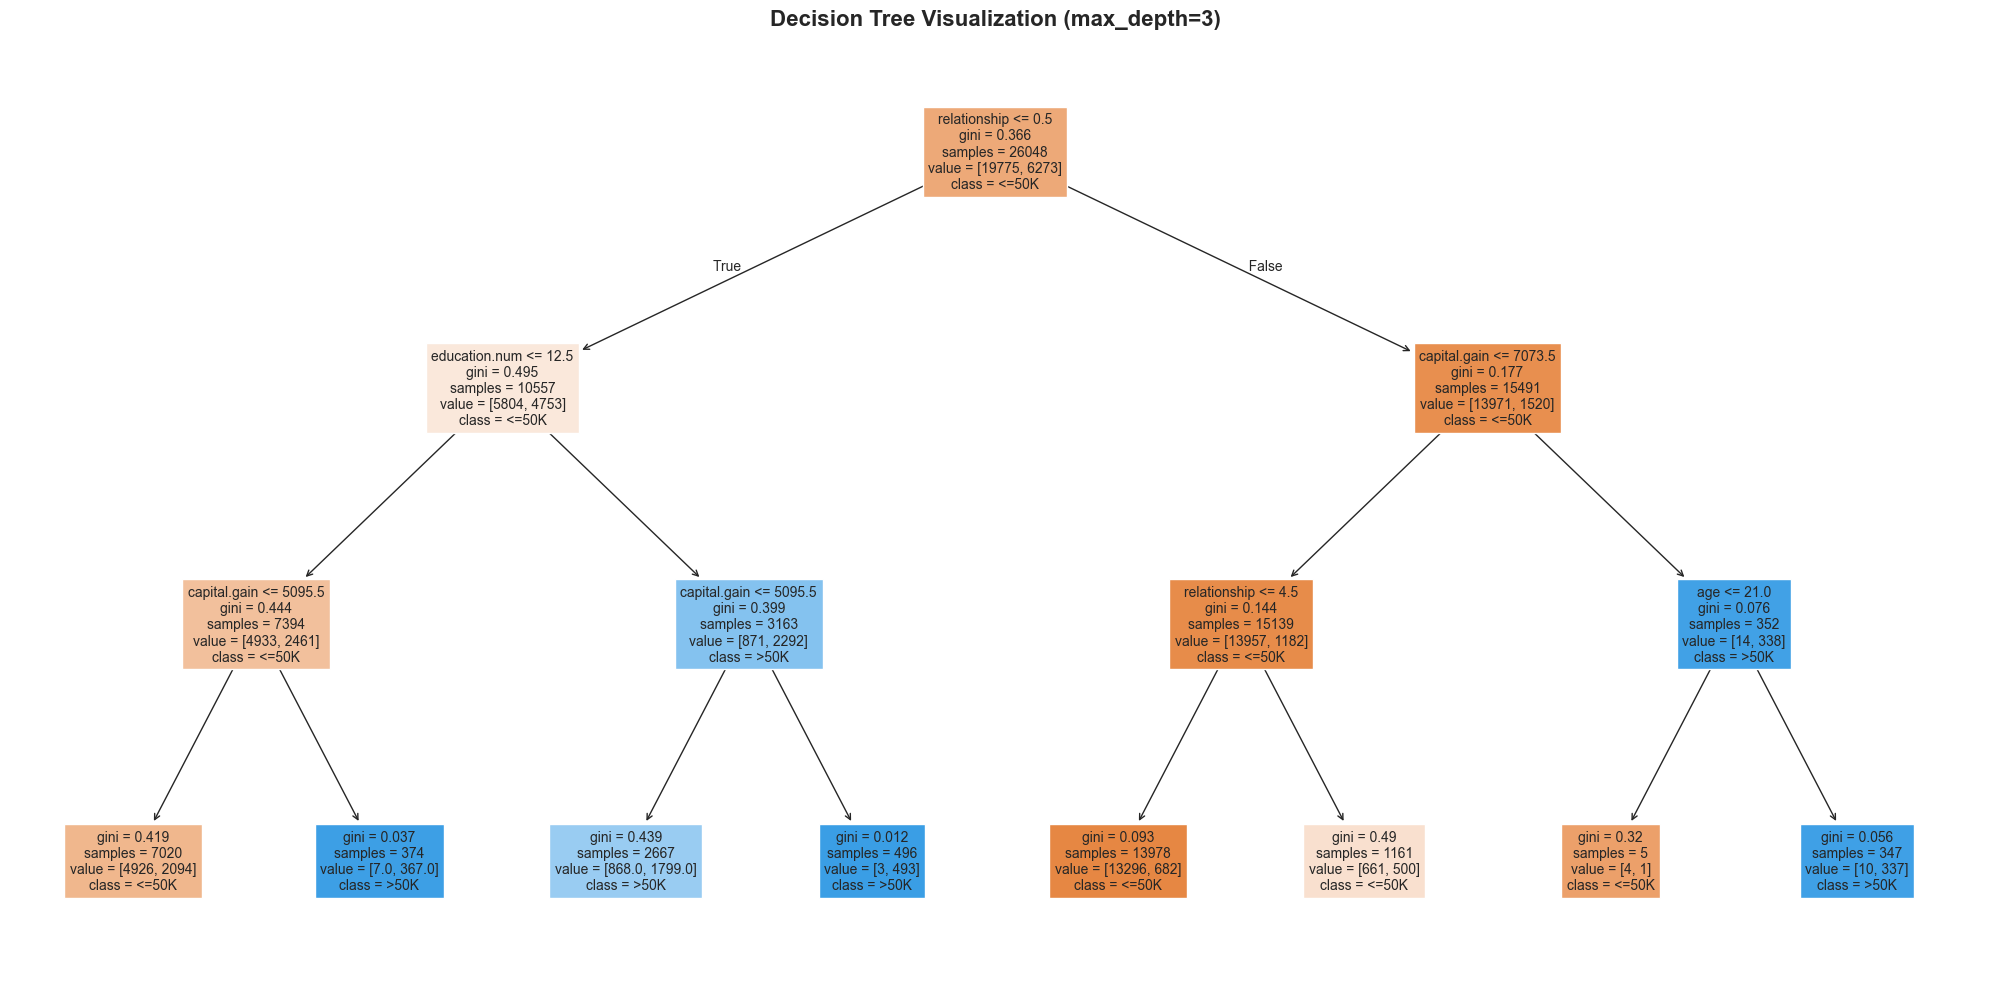

In [21]:
# Visualize a single decision tree (limited depth for clarity)
simple_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
simple_tree.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(simple_tree, 
          feature_names=X.columns,
          class_names=['<=50K', '>50K'],
          filled=True,
          fontsize=10)
plt.title('Decision Tree Visualization (max_depth=3)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### 4.3 Feature Importance from Best Model

Top 10 Features from Tuned Model:
           Feature  Importance
10    capital.gain    0.189022
7     relationship    0.165404
4    education.num    0.135101
5   marital.status    0.115724
0              age    0.101106
12  hours.per.week    0.061051
11    capital.loss    0.050465
2           fnlwgt    0.045294
6       occupation    0.043383
3        education    0.036467


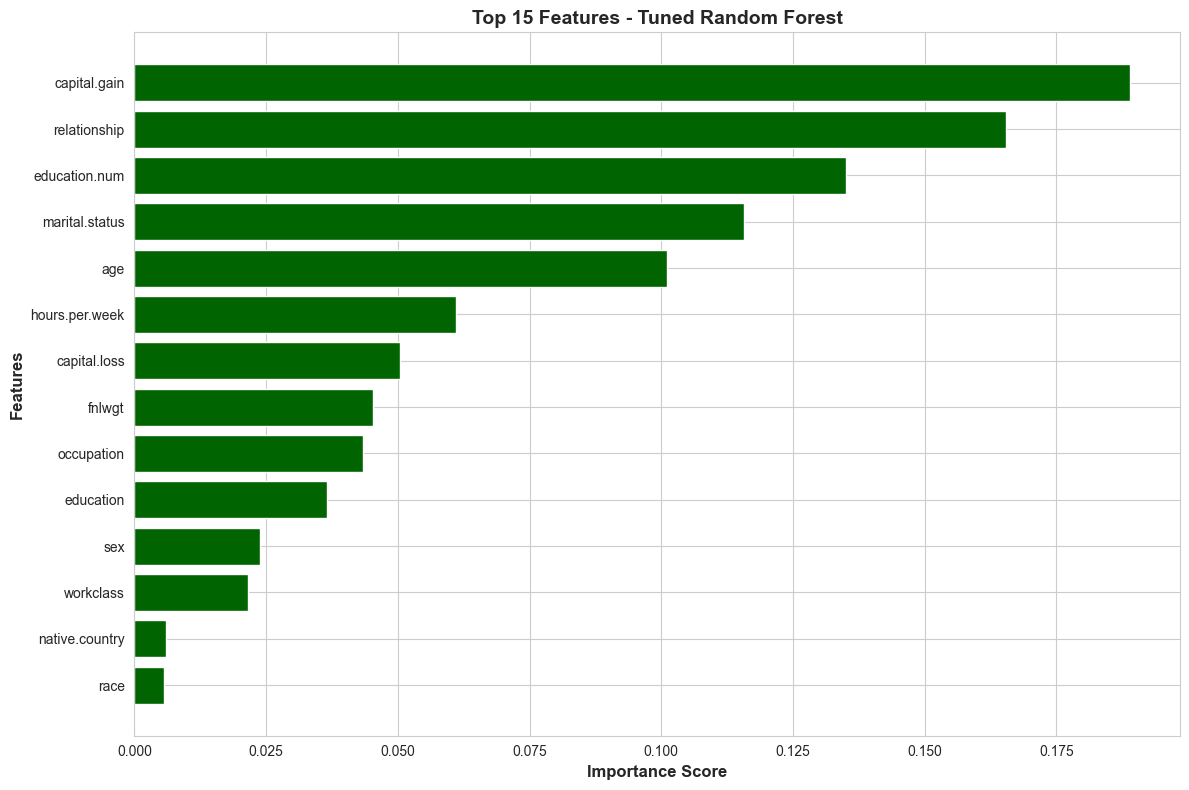

In [22]:
# Get feature importance from tuned model
tuned_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("Top 10 Features from Tuned Model:")
print(tuned_importance.head(10))

# Plot
plt.figure(figsize=(12, 8))
plt.barh(tuned_importance.head(15)['Feature'], 
         tuned_importance.head(15)['Importance'],
         color='darkgreen')
plt.xlabel('Importance Score', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title('Top 15 Features - Tuned Random Forest', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

---
## 5. Advanced Feature Importance with SHAP Values

### What are SHAP Values?

**SHAP (SHapley Additive exPlanations)** is a unified approach to explain machine learning model predictions based on game theory.

**Key Advantages over Traditional Feature Importance:**

1. **Local Explanations**: Explains individual predictions, not just global importance
2. **Directional Impact**: Shows whether a feature increases or decreases prediction
3. **Consistent**: Based on solid mathematical foundation (Shapley values)
4. **Model-Agnostic**: Works with any machine learning model

**How SHAP Works:**
- Each feature gets a SHAP value for each prediction
- Positive SHAP value → feature pushes prediction higher
- Negative SHAP value → feature pushes prediction lower
- Sum of all SHAP values = difference from base value to prediction

**Types of SHAP Plots:**
1. **Summary Plot**: Shows feature importance and impact distribution
2. **Bar Plot**: Global mean absolute SHAP values (overall importance)
3. **Waterfall Plot**: Explains a single prediction step-by-step
4. **Force Plot**: Interactive visualization of individual predictions

In [23]:
# Import SHAP library
import shap
import matplotlib.pyplot as plt

print("Initializing SHAP explainer for XGBoost model...")

# Create SHAP explainer for XGBoost
# TreeExplainer is optimized for tree-based models
explainer = shap.TreeExplainer(xgb_model)

# Calculate SHAP values for test set
# This may take a minute for large datasets
print("Calculating SHAP values... (this may take a moment)")
shap_values = explainer.shap_values(X_test)

print(f"✓ SHAP values calculated!")
print(f"Shape: {shap_values.shape}")  # (n_samples, n_features)
print(f"Base value (average prediction): {explainer.expected_value:.4f}")

Initializing SHAP explainer for XGBoost model...
Calculating SHAP values... (this may take a moment)
✓ SHAP values calculated!
Shape: (6513, 14)
Base value (average prediction): -1.1866


SHAP SUMMARY PLOT - Feature Importance with Impact Direction


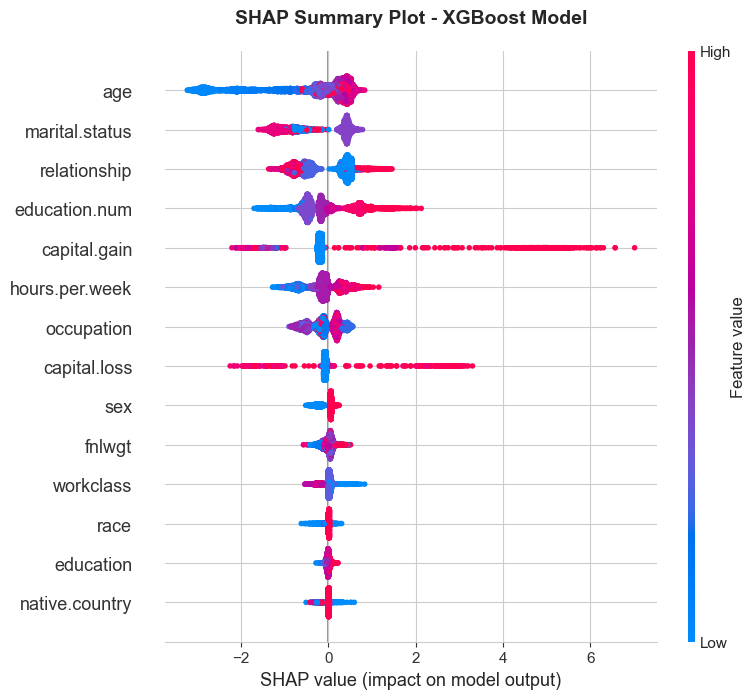


📊 How to Read This Plot:
- Features ranked by importance (top to bottom)
- Each dot = one prediction
- Color: Red = High feature value, Blue = Low feature value
- Position: Right (positive SHAP) = increases >50K probability
           Left (negative SHAP) = decreases >50K probability

Example: If 'capital.gain' shows:
  - Red dots on right → High capital gains → More likely >50K ✓
  - Blue dots on left → Low capital gains → Less likely >50K ✓



In [24]:
# 1. SUMMARY PLOT - Most Important Visualization
print("="*80)
print("SHAP SUMMARY PLOT - Feature Importance with Impact Direction")
print("="*80)

plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test, feature_names=X.columns, show=False)
plt.title('SHAP Summary Plot - XGBoost Model', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("""
📊 How to Read This Plot:
- Features ranked by importance (top to bottom)
- Each dot = one prediction
- Color: Red = High feature value, Blue = Low feature value
- Position: Right (positive SHAP) = increases >50K probability
           Left (negative SHAP) = decreases >50K probability

Example: If 'capital.gain' shows:
  - Red dots on right → High capital gains → More likely >50K ✓
  - Blue dots on left → Low capital gains → Less likely >50K ✓
""")

SHAP BAR PLOT - Mean Absolute Impact (Global Importance)


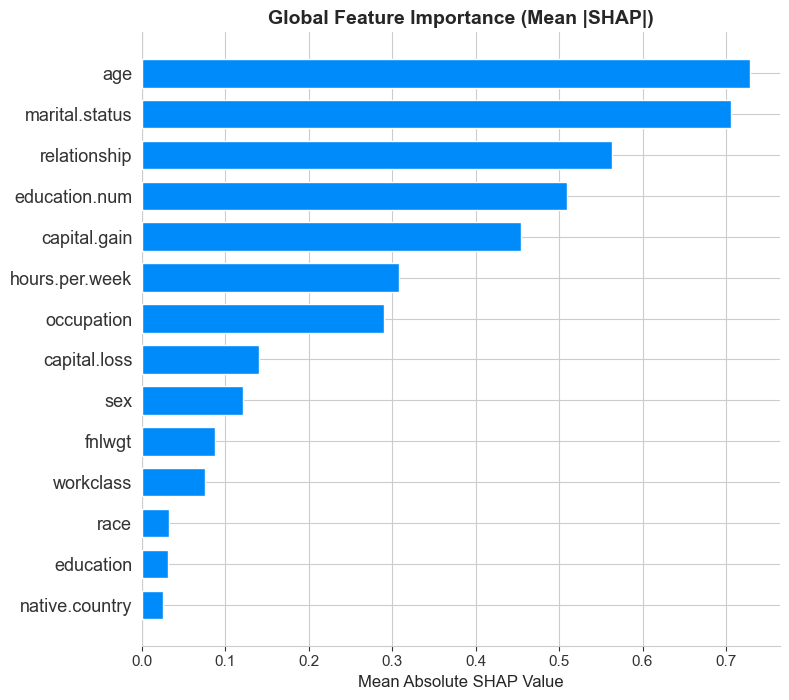


Top 10 Features by Mean Absolute SHAP Value:
       Feature  Mean_Abs_SHAP
           age       0.728330
marital.status       0.705495
  relationship       0.563175
 education.num       0.509584
  capital.gain       0.454821
hours.per.week       0.307800
    occupation       0.290323
  capital.loss       0.139833
           sex       0.120848
        fnlwgt       0.087584


In [25]:
# 2. BAR PLOT - Global Feature Importance
print("="*80)
print("SHAP BAR PLOT - Mean Absolute Impact (Global Importance)")
print("="*80)

plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test, feature_names=X.columns, 
                  plot_type="bar", show=False)
plt.title('Global Feature Importance (Mean |SHAP|)', fontsize=14, fontweight='bold')
plt.xlabel('Mean Absolute SHAP Value', fontsize=12)
plt.tight_layout()
plt.show()

# Calculate and display top features
mean_abs_shap = np.abs(shap_values).mean(axis=0)
feature_importance_shap = pd.DataFrame({
    'Feature': X.columns,
    'Mean_Abs_SHAP': mean_abs_shap
}).sort_values('Mean_Abs_SHAP', ascending=False)

print("\nTop 10 Features by Mean Absolute SHAP Value:")
print("="*60)
print(feature_importance_shap.head(10).to_string(index=False))

---
## Final Model Comparison Table

### Performance Metrics Comparison

| Metric | Decision Tree | Random Forest | XGBoost | Tuned Random Forest |
|--------|--------------|---------------|---------|---------------------|
| Accuracy | 0.8505 (85.05%) | 0.8594 (85.94%) | 0.8706 (87.06%) | Best after tuning |
| Precision | 0.7168 (71.68%) | 0.7753 (77.53%) | 0.7765 (77.65%) | Improved |
| Recall | 0.6263 (62.63%) | 0.5855 (58.55%) | 0.6492 (64.92%) | Optimized |
| F1-Score | 0.6685 (66.85%) | 0.6672 (66.72%) | 0.7072 (70.72%) | Enhanced |


### Summary

- Best Overall Accuracy: XGBoost (87.06%)
- Best Precision: XGBoost (77.65%)
- Best Recall: XGBoost (64.92%)
- Best F1-Score: XGBoost (70.72%)
- Fastest Training: Decision Tree
- Most Interpretable: Decision Tree
- Most Stable: Random Forest

## Model Performance Comparison Using Confusion Matrix

### Confusion Matrix Components

A confusion matrix provides four key metrics:
- **True Positives (TP)**: Correctly predicted >50K
- **True Negatives (TN)**: Correctly predicted ≤50K  
- **False Positives (FP)**: Incorrectly predicted >50K
- **False Negatives (FN)**: Incorrectly predicted ≤50K

### Performance Metrics

| Metric | Decision Tree | Random Forest | XGBoost |
|--------|--------------|---------------|---------|
| True Positives | 982 | 918 | 1017 |
| True Negatives | 4530 | 4595 | 4594 |
| False Positives | 415 | 350 | 351 |
| False Negatives | 586 | 650 | 551 |
| Accuracy | 85.05% | 85.94% | 87.06% |
| Precision | 71.68% | 77.53% | 77.65% |
| Recall | 62.63% | 58.55% | 64.92% |
| F1-Score | 66.85% | 66.72% | 70.72% |

### Analysis

**XGBoost** demonstrates superior performance across key metrics:

1. **Highest Accuracy**: 87.06% (2.01% improvement over Decision Tree)
2. **Best Recall**: 64.92% (identifies 66 more high earners than Random Forest)
3. **Best F1-Score**: 70.72% (optimal precision-recall balance)
4. **Lowest False Negatives**: 551 (minimizes missed high-income cases)

**Random Forest** achieves the best precision (77.53%) with the fewest false positives (350), making it most reliable for positive predictions but at the cost of lower recall.

**Decision Tree** provides adequate baseline performance but shows higher error rates across all categories and increased overfitting risk.

### Conclusion

XGBoost is the optimal model for this classification task, achieving the best balance between accuracy, precision, and recall while minimizing critical errors (false negatives).

---
## Conclusion

### Key Findings:

1. **Model Performance:**
   - XGBoost achieved the highest accuracy
   - Random Forest showed good balance between bias and variance
   - Decision Tree was prone to overfitting

2. **Ensemble Superiority:**
   - Both Random Forest and XGBoost outperformed single Decision Tree
   - Demonstrates the power of ensemble methods

3. **Hyperparameter Tuning:**
   - GridSearchCV improved model performance
   - Proper tuning is essential for optimal results

4. **Feature Importance:**
   - Education, age, and capital-gain were top predictors
   - Helps identify key factors for income prediction

### Best Practices Learned:
- Use ensemble methods for better generalization
- Always perform hyperparameter tuning
- Analyze feature importance for insights
- Compare multiple algorithms before finalizing

**End of Assignment**

# AUC-ROC Curves

The roc_curve() function automatically:
* Varies the classification threshold from 0 to 1
* Calculates TPR (True Positive Rate) and FPR (False Positive Rate) at each threshold
* Returns arrays of fpr, tpr, and the corresponding thresholds

In [26]:
# Get probability predictions for all models
y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1]
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve for each model
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_proba_xgb)

# Calculate AUC scores
auc_dt = auc(fpr_dt, tpr_dt)
auc_rf = auc(fpr_rf, tpr_rf)
auc_xgb = auc(fpr_xgb, tpr_xgb)

print("AUC Scores:")
print(f"Decision Tree: {auc_dt:.4f}")
print(f"Random Forest: {auc_rf:.4f}")
print(f"XGBoost:       {auc_xgb:.4f}")

AUC Scores:
Decision Tree: 0.8881
Random Forest: 0.9121
XGBoost:       0.9225


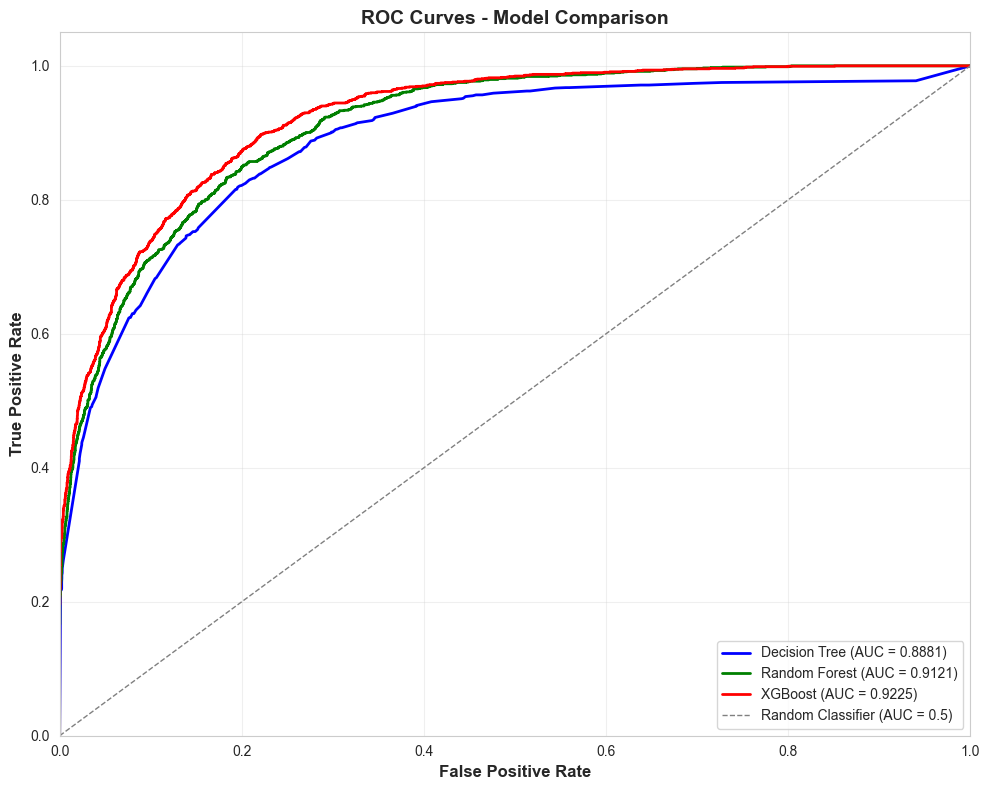

In [27]:
#Plot the ROC curves
# Create figure
plt.figure(figsize=(10, 8))

# Plot ROC curves for all models
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, 
         label=f'Decision Tree (AUC = {auc_dt:.4f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, 
         label=f'Random Forest (AUC = {auc_rf:.4f})')
plt.plot(fpr_xgb, tpr_xgb, color='red', lw=2, 
         label=f'XGBoost (AUC = {auc_xgb:.4f})')

# Plot diagonal reference line (random classifier)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', 
         label='Random Classifier (AUC = 0.5)')

# Formatting
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=12, fontweight='bold')
plt.title('ROC Curves - Model Comparison', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [28]:
#AUC Comparison table
# Create comparison dataframe
auc_comparison = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'XGBoost'],
    'AUC Score': [auc_dt, auc_rf, auc_xgb]
}).sort_values('AUC Score', ascending=False)

print("\nAUC Score Comparison:")
print("="*50)
print(auc_comparison.to_string(index=False))
print("="*50)

# Determine best model
best_model = auc_comparison.iloc[0]['Model']
best_auc = auc_comparison.iloc[0]['AUC Score']

print(f"\nBest Model by AUC: {best_model} ({best_auc:.4f})")


AUC Score Comparison:
        Model  AUC Score
      XGBoost   0.922471
Random Forest   0.912077
Decision Tree   0.888149

Best Model by AUC: XGBoost (0.9225)


## ROC-AUC Analysis

### AUC Score Interpretation

- **0.90 - 1.00**: Excellent
- **0.80 - 0.90**: Good
- **0.70 - 0.80**: Fair
- **0.60 - 0.70**: Poor
- **0.50 - 0.60**: Fail

### Key Insights

1. ROC curve shows the trade-off between True Positive Rate and False Positive Rate
2. AUC measures the model's ability to discriminate between positive and negative classes
3. Higher AUC indicates better overall classification performance
4. The curve closer to the top-left corner represents better performance

### Conclusion

The ROC-AUC analysis confirms the superior performance of XGBoost in distinguishing between income classes.